In [1]:
import pandas as pd
from PIL import Image
from helpers import display_image
from torchvision import datasets

In [2]:
SAMPLE_SIZE = 5
DATA_DIR = '../data'
IMAGES_DIR = '../data/VOCdevkit/VOC2012'

In [3]:
datasets.VOCSegmentation(DATA_DIR, image_set='val', download=True, 
                          transform=None,
                          target_transform=None)

0it [00:00, ?it/s]Downloading http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar to ../data\VOCtrainval_11-May-2012.tar
1999642624it [05:00, 7496771.58it/s]

Dataset VOCSegmentation
    Number of datapoints: 1449
    Root location: ../data

In [4]:
def show_image_and_segmentation_pair(filename):
    original = Image.open(f'{IMAGES_DIR}/JPEGImages/{filename}.jpg')
    segmented = Image.open(f'{IMAGES_DIR}/SegmentationClass/{filename}.png')

    # Concatenate Images 
    concatenated_image = Image.new('RGB', (original.width * 2, original.height))
    concatenated_image.paste(original, (0, 0))
    concatenated_image.paste(segmented, (original.width, 0))

    display_image(concatenated_image, size=(12, 8))

In [5]:
def main():
    # View sample of segmentation images

    train_images = pd.read_table(f'{IMAGES_DIR}/ImageSets/Segmentation/train.txt', 
                                 header=None, squeeze=True)

    # Get 5 random images and show their semantic segmatation
    filenames = train_images.sample(5, random_state=2)
    filenames.map(show_image_and_segmentation_pair)

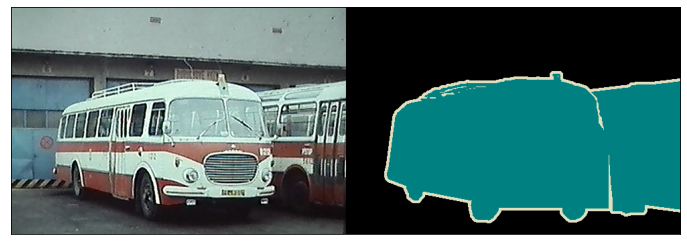

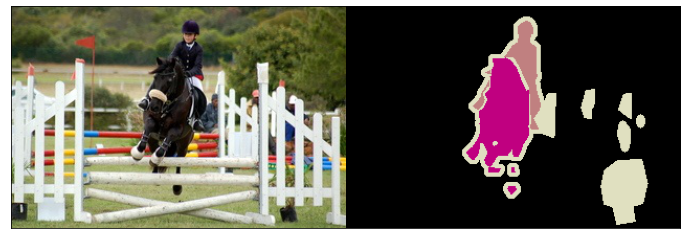

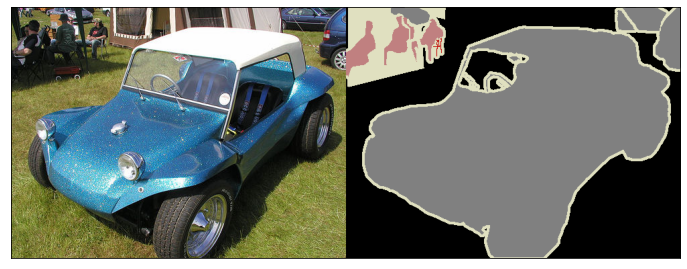

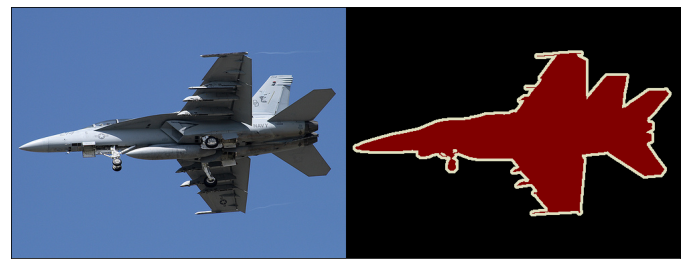

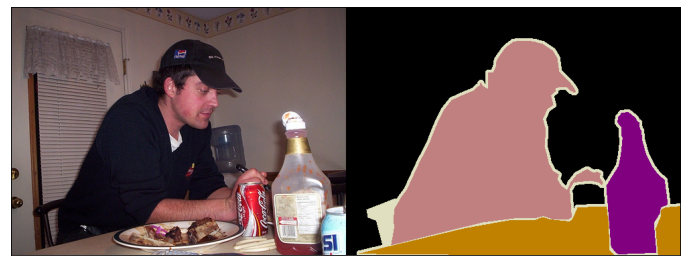

In [6]:
if __name__ == '__main__':
    main()